In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# IQ Imbalance correction

## Creating test data

In [2]:
#signal parameters
fs = 5e3
fc = 1e3
sigLen = 500


#clean signal, complex sinusoid at 1000 Hz
cleanSig = np.exp(1j*2*np.pi*fc*np.arange(sigLen)/fs)

#add impairment
alpha = np.random.randn(1) #amplitude offset
beta = np.random.randn(1) #phase offset
capSig = cleanSig.copy()
capSig += alpha*np.exp(1j*beta)*np.ones_like(capSig) + np.random.randn(sigLen)
capSig /= max(np.abs(capSig))

## FFT stuff

In [3]:
cleanFFT = np.fft.fftshift(np.fft.fft(cleanSig,4096))
capFFT = np.fft.fftshift(np.fft.fft(capSig,4096))

## plots

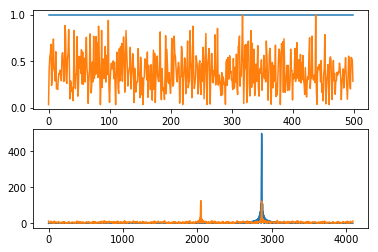

In [4]:
plt.figure()
plt.subplot(211)
plt.plot(np.abs(cleanSig))
plt.plot(np.abs(capSig))
plt.subplot(212)
plt.plot(np.abs(cleanFFT))
plt.plot(np.abs(capFFT))
plt.show()

Filtering

In [12]:
b = signal.firwin(130,0.1)
noise = np.random.rand(10000)
out = np.zeros(10000 + 129)

In [30]:
#linear convolution
count = 0
for x in xrange(int(len(noise)/130)):
    out[x] = np.dot(noise[x*129+np.arange(130)],b)

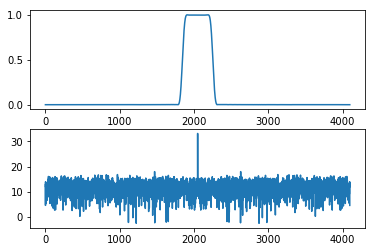

In [33]:
plt.subplot(211)
plt.plot(np.fft.fftshift(np.abs(np.fft.fft(b,4096))))
plt.subplot(212)
#plt.plot(np.fft.fftshift(np.abs(np.fft.fft(noise,4096))))
plt.plot(10*np.log10(np.fft.fftshift(np.abs(np.fft.fft(out,4096)))))
plt.show()

In [25]:
77*130

10010